In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
from matplotlib.lines import Line2D

warnings.simplefilter(action='ignore', category=FutureWarning)

# Conversion factor
meters_per_pixel = 1.4949402023919043E-07  # Micrometers per pixel
micrometers_per_pixel = meters_per_pixel*1E6 # Micrometers per pixel

In [2]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Nimbus Sans'
# import matplotlib as mpl
# mpl.rcdefaults()
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)

In [4]:
output_dir = '/mnt/SYNO/macrohet_syno/results/manuscript/dt_dist'#/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [195]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/results/dfs/sc_df_partialND4.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,ID,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,...,Mtb Area Model (µm),mtb_origin,Doubling Amounts,Doubling Times,r2,level_1,t,Unique_ID,Frame,Strain/Compound
0,1.3.2.ND0002,0.0,0.0,0.0,4649.351562,2080.574775,NaN,False,False,107.845200,...,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN,CTRL
1,1.3.2.ND0002,0.5,0.0,0.0,4973.001953,2080.574775,NaN,False,False,113.264671,...,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN,CTRL
2,1.3.2.ND0002,1.0,0.0,0.0,4687.857910,2080.574775,NaN,False,False,116.562256,...,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN,CTRL
3,1.3.2.ND0002,1.5,0.0,0.0,4209.064453,2080.574775,NaN,False,False,111.890106,...,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN,CTRL
4,1.3.2.ND0002,2.0,0.0,0.0,4061.855225,2080.574775,False,False,False,114.113556,...,0.0,None,None,None,1.0,NaN,NaN,NaN,NaN,CTRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210149,994.4.8.ND0004,74.5,0.0,NaN,311.939834,NaN,NaN,False,False,4308.000000,...,NaN,NaN,None,None,1.0,13861.0,149.0,994.4.8.ND0004,149.0,RIF
1210150,994.4.8.ND0004,75.0,0.0,NaN,1598.697235,NaN,NaN,False,False,4303.000000,...,NaN,NaN,None,None,1.0,13862.0,150.0,994.4.8.ND0004,150.0,RIF
1210151,994.4.8.ND0004,75.5,NaN,NaN,NaN,NaN,NaN,False,False,4293.000000,...,NaN,NaN,None,None,1.0,13863.0,151.0,994.4.8.ND0004,151.0,RIF
1210152,994.4.8.ND0004,76.0,NaN,NaN,NaN,NaN,NaN,False,False,4299.000000,...,NaN,NaN,None,None,1.0,13864.0,152.0,994.4.8.ND0004,152.0,RIF


### Filter out doubling populations

In [196]:
df = df[df['Doubling Times'].isna()]

In [197]:
df = df[(df['Initial Infection Status'] == True) & (df['Final Infection Status'] == True)]

### Filter out unreliable tracks

In [198]:
df = df[df['r2'] >= 0.8]

### Implement gradient assessment

In [199]:
from scipy.stats import linregress
# Create an empty list to store the slopes
slopes = []

# Iterate over each group by 'ID'
for curve_id, group in tqdm(df.groupby('ID')):
    try:
        slope, _, _, _, _ = linregress(group['Time Model (hours)'].dropna(), group['Mtb Area Model (µm)'].dropna())
        slopes.append((curve_id, slope))
    except:
        print(curve_id)

# Convert the results list to a DataFrame
slope_df = pd.DataFrame(slopes, columns=['ID', 'Slope'])



100%|███████████████████████████████████████| 532/532 [00:00<00:00, 2101.30it/s]


In [200]:
df = df.merge(slope_df, on='ID', how='left')


In [201]:
df

,ID,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,...,mtb_origin,Doubling Amounts,Doubling Times,r2,level_1,t,Unique_ID,Frame,Strain/Compound,Slope
0,10.3.10.ND0002,0.0,82.510522,59.156379,877.490015,1734.620582,NaN,True,True,290.188324,...,None,None,None,0.97,NaN,NaN,NaN,NaN,INH,0.967552
1,10.3.10.ND0002,0.5,85.952185,59.156379,1020.542521,1734.620582,NaN,True,True,289.465942,...,None,None,None,0.97,NaN,NaN,NaN,NaN,INH,0.967552
2,10.3.10.ND0002,1.0,85.281731,59.156379,1176.802968,1734.620582,NaN,True,True,291.017395,...,None,None,None,0.97,NaN,NaN,NaN,NaN,INH,0.967552
3,10.3.10.ND0002,1.5,88.097638,59.156379,1265.772196,1734.620582,NaN,True,True,294.715546,...,None,None,None,0.97,NaN,NaN,NaN,NaN,INH,0.967552
4,10.3.10.ND0002,2.0,NaN,59.156379,NaN,1734.620582,True,True,True,297.908722,...,None,None,None,0.97,NaN,NaN,NaN,NaN,INH,0.967552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53458,890.4.8.ND0004,45.0,22.102629,NaN,411.256399,NaN,NaN,True,True,5662.000000,...,NaN,None,None,0.81,13137.0,90.0,890.4.8.ND0004,90.0,RIF,-0.229822
53459,890.4.8.ND0004,45.5,NaN,NaN,NaN,NaN,NaN,True,True,5691.000000,...,NaN,None,None,0.81,13138.0,91.0,890.4.8.ND0004,91.0,RIF,-0.229822
53460,890.4.8.ND0004,46.0,NaN,NaN,NaN,NaN,NaN,True,True,5678.000000,...,NaN,None,None,0.81,13139.0,92.0,890.4.8.ND0004,92.0,RIF,-0.229822
53461,890.4.8.ND0004,46.5,NaN,NaN,NaN,NaN,NaN,True,True,5677.000000,...,NaN,None,None,0.81,13140.0,93.0,890.4.8.ND0004,93.0,RIF,-0.229822


In [202]:
slopes = sorted(slopes, key=lambda x: abs(x[1]))


In [203]:
slopes

[('299.4.7.ND0003', 0.000895250265623257),
 ('515.4.7.PS0000', 0.006962255623611661),
 ('1601.3.3.ND0002', 0.007829743713711463),
 ('169.6.6.PS0000', -0.00893728465248232),
 ('583.5.8.PS0000', 0.009005126115758247),
 ('40.6.5.ND0002', -0.009774987121465102),
 ('33.6.6.PS0000', -0.010036120075889995),
 ('105.4.8.ND0002', 0.011441065323065441),
 ('180.4.7.PS0000', -0.012399462410328762),
 ('310.5.6.PS0000', -0.0129687255312799),
 ('44.6.7.ND0002', -0.013200347732941264),
 ('376.5.6.PS0000', -0.014614327377506514),
 ('277.5.8.PS0000', 0.016804834735613346),
 ('408.6.7.PS0000', -0.016808149217712124),
 ('173.6.8.PS0000', 0.01717078137222828),
 ('1153.4.7.ND0004', -0.017943796481573793),
 ('1182.6.5.ND0003', -0.01813914315309505),
 ('456.6.8.PS0000', 0.018841459911363434),
 ('305.5.7.PS0000', 0.018900520508754116),
 ('310.4.6.PS0000', 0.019475791347063637),
 ('265.6.8.PS0000', 0.019733469811781534),
 ('127.3.7.ND0002', 0.020117099387485127),
 ('21.6.5.ND0002', -0.021047833700380953),
 ('168

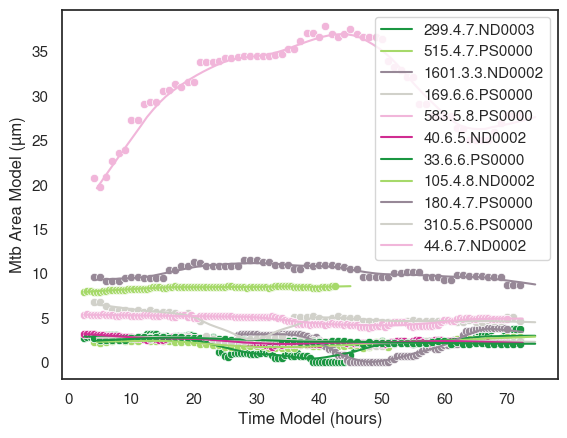

In [165]:
i = 0
# for ID in df[(df['dMtb Area (µm)'] < 2) & (df['dMtb Area (µm)'] > -2)].ID.unique():
for ID, slope in slopes:
    # if i > 10: continue
    if -0.2 < slope < 0.2:
        i += 1
        sc_df = df[df['ID'] == ID]
        sns.lineplot(y = sc_df['Mtb Area Model (µm)'], x = sc_df['Time Model (hours)']+2.5, label = ID)
        # sns.scatterplot(y = sc_df['Mtb Area Processed (µm)'], x = sc_df['Time Model (hours)'])

In [166]:
df = df[(df['Slope'] > -0.2) & (df['Slope'] < 0.2)]

In [168]:
df.ID.nunique()

295

In [179]:
sc_df['Mtb Area Model (µm)'].dropna()

33420    19.009101
33421    19.278862
33422    19.526517
33423    19.744256
33424    19.920247
           ...    
33486     4.824328
33487     4.750407
33488     4.673954
33489     4.595233
33490     4.514150
Name: Mtb Area Model (µm), Length: 71, dtype: float64

In [229]:
sns.palette('PiYG')

AttributeError: module 'seaborn' has no attribute 'palette'

100%|█████████████████████████████████████████| 532/532 [00:11<00:00, 45.33it/s]


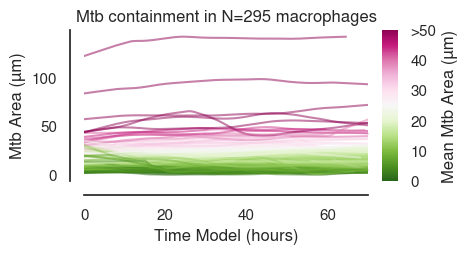

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from tqdm import tqdm

# Create a continuous colormap using ListedColormap
# palette = ['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']
cmap = plt.cm.PiYG_r #mcolors.LinearSegmentedColormap.from_list("expanded_piyg_continuous", palette)

# Normalize color values based on the initial Mtb Area range for color mapping
norm = mcolors.Normalize(vmin=0, vmax=50)  # Assuming initial Mtb Area ranges from 0 to 40

fig, ax = plt.subplots(figsize=(115/25.4, 50/25.4))

i = 0
for ID, slope in tqdm(slopes):
    if -0.2 < slope < 0.2:
        i += 1
        sc_df = df[df['ID'] == ID]
        initial_y = sc_df['Mtb Area Model (µm)'].dropna().mean()
        if ID == '427.4.6.PS0000':
            continue

        # Map initial_y to a color in the continuous colormap
        color = cmap(norm(initial_y))

        # Plot line with the mapped color
        sns.lineplot(y=sc_df['Mtb Area Model (µm)'], 
                     x=sc_df['Time Model (hours)'] - sc_df['Time Model (hours)'].min(),  
                     alpha=0.5, color=color, ax=ax,)# lw = 2)
        # sns.lineplot(y=sc_df['Mtb Area Model (µm)'], 
        #              x=sc_df['Time Model (hours)'] - sc_df['Time Model (hours)'].min(),  
        #              alpha=0.5, color='gray', ax=ax, lw = 2.1)

# Add labels and limits
ax.set_xlabel("Time Model (hours)")
ax.set_ylabel("Mtb Area (µm)")
ax.set_xlim(0, 70)
sns.despine(offset=10)

# Add a continuous color bar for the initial Mtb Area
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect=10, pad=0.04, )
cbar.set_label("Mean Mtb Area (µm)")
cbar.outline.set_visible(False)  # Remove color bar border
# Remove tick marks from the color bar
cbar.ax.tick_params(left=False, right=False)
# Manually set color bar tick labels
custom_ticks = [0, 10, 20, 30, 40, 50]  # Define your tick positions
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels([f"{tick}" if tick < 50 else f">{tick}" for tick in custom_ticks])
plt.title(f'Mtb containment in N={i} macrophages')
# Save the plot
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/timeseries_with_continuous_colorbar.pdf', bbox_inches='tight', dpi=314)
plt.show()


In [217]:
df[(df['Acquisition ID'] == (4, 6)) & (df['Experiment ID'] == 'PS0000')]['Concentration']

9174     EC50
9175     EC50
9176     EC50
9177     EC50
9178     EC50
         ... 
44315    EC50
44316    EC50
44317    EC50
44318    EC50
44319    EC50
Name: Concentration, Length: 898, dtype: object

50.4.9.ND0002
1051.4.5.ND0003
394.3.8.ND0003
427.4.6.PS0000


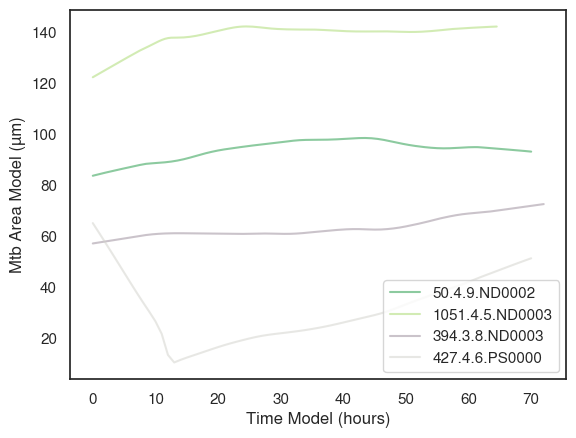

In [214]:
for ID in IDs:
    sc_df = df[df['ID'] == ID]
    initial_y = sc_df['Mtb Area Model (µm)'].dropna().iloc[0]
    if initial_y > 50:
        print(ID)
    # # Determine color based on initial y value by binning it into the color palette
    # color_idx = int((initial_y) / 
    #                 (40) * 5)
    # color_idx = min(color_idx, 5)  # To ensure index stays within bounds of palette

    # Plot line and scatter with appropriate color
    sns.lineplot(y=sc_df['Mtb Area Model (µm)'], x=sc_df['Time Model (hours)']- sc_df['Time Model (hours)'].min(),  alpha =0.5,
                 label=ID,
                
                 # color=palette[color_idx]
                )

In [190]:
sns.scatterplot(data = df, x = 'Slope')

,ID,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,...,mtb_origin,Doubling Amounts,Doubling Times,r2,level_1,t,Unique_ID,Frame,Strain/Compound,Slope
327,102.6.8.PS0000,0.0,3.307572,3.374618,553.571406,392.841267,NaN,True,True,242.783524,...,None,None,None,0.96,NaN,NaN,NaN,NaN,INH,0.045675
328,102.6.8.PS0000,1.0,2.793558,3.374618,799.091610,392.841267,NaN,True,True,237.006042,...,None,None,None,0.96,NaN,NaN,NaN,NaN,INH,0.045675
329,102.6.8.PS0000,2.0,3.464012,3.374618,984.628543,392.841267,True,True,True,244.366135,...,None,None,None,0.96,NaN,NaN,NaN,NaN,INH,0.045675
330,102.6.8.PS0000,3.0,3.262875,3.374618,926.924814,392.841267,True,True,True,247.454346,...,None,None,None,0.96,NaN,NaN,NaN,NaN,INH,0.045675
331,102.6.8.PS0000,4.0,3.218179,3.374618,882.920692,392.841267,True,True,True,254.858871,...,None,None,None,0.96,NaN,NaN,NaN,NaN,INH,0.045675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52537,2065.4.8.ND0004,74.5,39.221551,NaN,764.183313,NaN,NaN,True,True,5364.000000,...,NaN,None,None,0.86,21369.0,149.0,2065.4.8.ND0004,149.0,RIF,0.039023
52538,2065.4.8.ND0004,75.0,43.937076,NaN,773.770803,NaN,NaN,True,True,5363.000000,...,NaN,None,None,0.86,21370.0,150.0,2065.4.8.ND0004,150.0,RIF,0.039023
52539,2065.4.8.ND0004,75.5,43.065486,NaN,818.780605,NaN,NaN,True,True,5376.000000,...,NaN,None,None,0.86,21371.0,151.0,2065.4.8.ND0004,151.0,RIF,0.039023
52540,2065.4.8.ND0004,76.0,40.093141,NaN,768.273081,NaN,NaN,True,True,5355.000000,...,NaN,None,None,0.86,21372.0,152.0,2065.4.8.ND0004,152.0,RIF,0.039023


/tmp/ipykernel_28474/1710305630.py:10: UserWarning: 
The palette list has fewer values (6) than needed (532) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)',


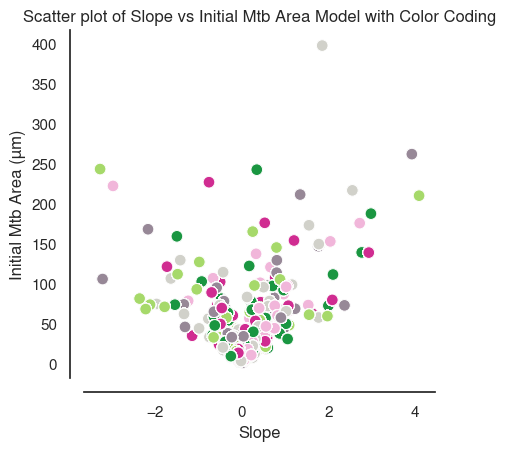

In [245]:
 # Adjust color palette
palette = sns.color_palette(['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91'])
sns.set_palette(palette)

# Initialize a new column for the initial Mtb Area Model to color code by initial value
df['Initial Mtb Area (µm)'] = df.groupby('ID')['Mtb Area Model (µm)'].transform('first')

# Plot scatter plot of slope vs initial Mtb Area with color coding
plt.figure(figsize=(115/25.4, 115/25.4))
sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)', 
                hue='Initial Mtb Area (µm)', legend = False,
                palette=palette, edgecolor="w", s=70)

plt.xlabel("Slope")
plt.ylabel("Initial Mtb Area (µm)")
# plt.xlim(-0.2, 0.2)
# plt.ylim(0, 40)
plt.title("Scatter plot of Slope vs Initial Mtb Area Model with Color Coding")
sns.despine(offset=10)

# Save the plot
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/slope_vs_initial_mtb_area_palette_coded.pdf', bbox_inches='tight', dpi=314)
plt.show()

/tmp/ipykernel_28474/2812911172.py:10: UserWarning: 
The palette list has fewer values (6) than needed (532) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)',


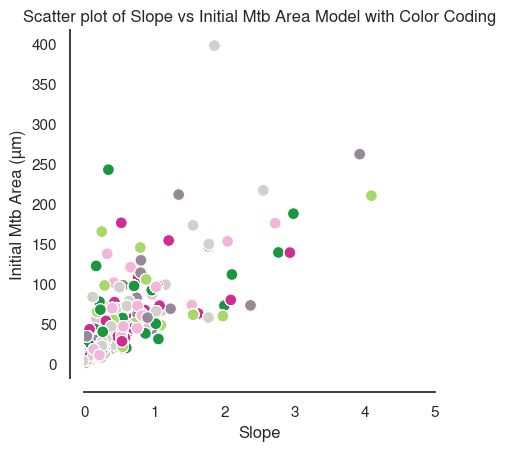

In [246]:
 # Adjust color palette
palette = sns.color_palette(['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91'])
sns.set_palette(palette)

# Initialize a new column for the initial Mtb Area Model to color code by initial value
df['Initial Mtb Area (µm)'] = df.groupby('ID')['Mtb Area Model (µm)'].transform('first')

# Plot scatter plot of slope vs initial Mtb Area with color coding
plt.figure(figsize=(115/25.4, 115/25.4))
sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)', 
                hue='Initial Mtb Area (µm)', legend = False,
                palette=palette, edgecolor="w", s=70)

plt.xlabel("Slope")
plt.ylabel("Initial Mtb Area (µm)")
plt.xlim(0, 5)
# plt.ylim(0, 40)
plt.title("Scatter plot of Slope vs Initial Mtb Area Model with Color Coding")
sns.despine(offset=10)

# Save the plot
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/positive_slope_vs_initial_mtb_area_palette_coded.pdf', bbox_inches='tight', dpi=314)
plt.show()

In [274]:
len(colors_with_alpha)

256

In [279]:
df['Color']

0        [0.3750096116878124, 0.6339100346020761, 0.176...
1        [0.9810841983852364, 0.839677047289504, 0.9178...
2        [0.15294117647058825, 0.39215686274509803, 0.0...
3        [0.6160707420222992, 0.031910803537101115, 0.3...
4        [0.8948865820838141, 0.9577085736255287, 0.804...
                               ...                        
53458    [0.9718569780853518, 0.9562475970780469, 0.964...
53459    [0.8524413687043447, 0.9392541330257594, 0.736...
53460    [0.9589388696655132, 0.7621683967704729, 0.879...
53461    [0.9534025374855825, 0.742791234140715, 0.8694...
53462    [0.8170703575547869, 0.9238754325259516, 0.679...
Name: Color, Length: 53463, dtype: object

/tmp/ipykernel_28474/3133978957.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = cm.get_cmap("PiYG")  # Original colormap


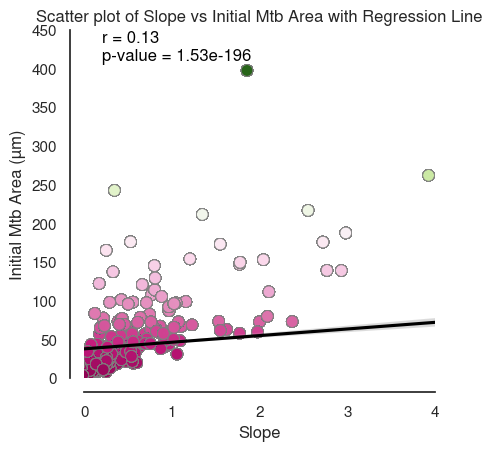

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm

from scipy.stats import linregress

 # Adjust color palette
# palette = sns.color_palette(['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91'])
# sns.set_palette(palette)
# Create a colormap with a specified alpha channel
base_cmap = cm.get_cmap("PiYG")  # Original colormap
colors_with_alpha = base_cmap(np.linspace(0, 1, 256))
colors_with_alpha[:, 3] = 0.6  # Set alpha to 0.6 for all colors

# Create a new colormap with the modified colors
palette = mcolors.ListedColormap(colors_with_alpha)


# Initialize a new column for the mean Mtb Area Model to color code by mean value
df['Mean Mtb Area (µm)'] = df.groupby('ID')['Mtb Area Model (µm)'].transform('mean')
# Initialize a new column for the initial Mtb Area Model to color code by initial value
df['Initial Mtb Area (µm)'] = df.groupby('ID')['Mtb Area Model (µm)'].transform('first')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(115/25.4, 115/25.4))

# Plot scatter plot color-coded by mean Mtb Area
scatter = sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)', 
                          hue='Initial Mtb Area (µm)', palette=palette, s=70, legend=False, ax=ax,edgecolors='gray', linewidths=0.5)
# # Plot scatter plot color-coded by mean Mtb Area
# scatter = sns.scatterplot(data=df, x='Slope', y='Initial Mtb Area (µm)', 
#                           hue='Initial Mtb Area (µm)', palette=palette, edgecolor="gray", s=72, legend=False, ax=ax)

# Calculate the regression line, r-value, and p-value
slope_data = df[['Slope', 'Initial Mtb Area (µm)']].dropna()
regression = linregress(slope_data['Slope'], slope_data['Initial Mtb Area (µm)'])

# Plot regression line
sns.regplot(data=df, x='Slope', y='Initial Mtb Area (µm)', scatter=False, color='black', ax=ax, )

# Annotate r-value and p-value on the plot
ax.annotate(f'r = {regression.rvalue:.2f}\np-value = {regression.pvalue:.2e}', 
            xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='center', fontsize=12, color='black')

ax.set_xlabel("Slope")
ax.set_ylabel("Initial Mtb Area (µm)")
ax.set_xlim(0, 4)
ax.set_ylim(0, 450)
ax.set_title("Scatter plot of Slope vs Initial Mtb Area with Regression Line")
sns.despine(offset=10)

# # Add a continuous color bar for the mean Mtb Area
# norm = plt.Normalize(df['Mean Mtb Area (µm)'].min(), df['Mean Mtb Area (µm)'].max())
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax, aspect=10, pad=0.04)
# cbar.set_label("Mean Mtb Area (µm)")
# cbar.outline.set_visible(False)  # Remove color bar border
# # Remove tick marks from the color bar
# cbar.ax.tick_params(left=False, right=False)
# Save the plot
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/slope_vs_initial_mtb_area_with_regression_r_value.pdf', bbox_inches='tight', dpi=314)
plt.show()


/tmp/ipykernel_28474/2243710628.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = cm.get_cmap("PiYG")  # Original colormap


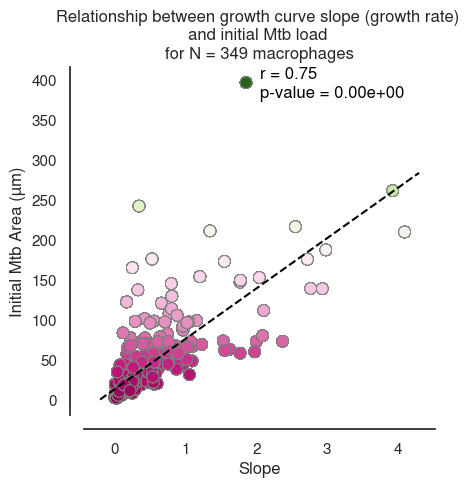

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Filter the DataFrame to include only positive slopes
df_filtered = df[df['Slope'] >= 0].copy()

# Create a colormap with a specified alpha channel
base_cmap = cm.get_cmap("PiYG")  # Original colormap
colors_with_alpha = base_cmap(np.linspace(0, 1, 256))
colors_with_alpha[:, 3] = 0.6  # Set alpha to 0.6 for all colors

# Create a new colormap with the modified colors
palette = mcolors.ListedColormap(colors_with_alpha)

# Initialize a new column for the initial Mtb Area to color code by mean value
df_filtered['Initial Mtb Area (µm)'] = df_filtered.groupby('ID')['Mtb Area Model (µm)'].transform('first')

fig, ax = plt.subplots(figsize=(115/25.4, 115/25.4))

# Plot scatter plot color-coded by initial Mtb Area, using the modified colormap with alpha
scatter = sns.scatterplot(data=df_filtered, x='Slope', y='Initial Mtb Area (µm)', 
                          hue='Initial Mtb Area (µm)', palette=palette, s=70, 
                          legend=False, ax=ax, edgecolors='gray', linewidths=0.5)

# Calculate the regression line, r-value, and p-value from the filtered data
slope_data = df_filtered[['Slope', 'Initial Mtb Area (µm)']].dropna()
regression = linregress(slope_data['Slope'], slope_data['Initial Mtb Area (µm)'])

# Plot regression line manually with a dashed style
x_vals = np.array(ax.get_xlim())
y_vals = regression.intercept + regression.slope * x_vals
ax.plot(x_vals, y_vals, '--', color='black')

# Annotate r-value and p-value on the plot
ax.annotate(f'r = {regression.rvalue:.2f}\np-value = {regression.pvalue:.2e}', 
            xy=(0.5, 0.95), xycoords='axes fraction', ha='left', va='center', fontsize=12, color='black')
plt.title(f'Relationship between growth curve slope (growth rate) \nand initial Mtb load \nfor N = {df_filtered.ID.nunique()} macrophages')
ax.set_xlabel("Slope")
ax.set_ylabel("Initial Mtb Area (µm)")
sns.despine(offset=10)
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/slope_vs_initial_mtb_area_with_regression_r_value.pdf', bbox_inches='tight', dpi=314)

plt.show()


/tmp/ipykernel_28474/1072564623.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = cm.get_cmap("PiYG")  # Original colormap


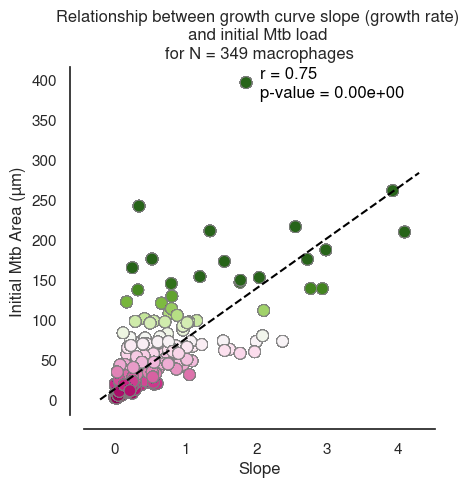

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Filter the DataFrame to include only positive slopes
df_filtered = df[df['Slope'] >= 0].copy()

# Create a colormap with a specified alpha channel
base_cmap = cm.get_cmap("PiYG")  # Original colormap
colors_with_alpha = base_cmap(np.linspace(0, 1, 256))
colors_with_alpha[:, 3] = 0.6  # Set alpha to 0.6 for all colors

# Create a new colormap with the modified colors
palette = mcolors.ListedColormap(colors_with_alpha)

# Initialize a new column for the initial Mtb Area to color code by mean value
df_filtered['Initial Mtb Area (µm)'] = df_filtered.groupby('ID')['Mtb Area Model (µm)'].transform('first')

# Set up a normalization that caps the upper limit at 100
norm = mcolors.Normalize(vmin=df_filtered['Initial Mtb Area (µm)'].min(), vmax=150)

fig, ax = plt.subplots(figsize=(115/25.4, 115/25.4))

# Plot scatter plot with color-coded initial Mtb Area using the modified colormap with alpha and capped normalization
scatter = sns.scatterplot(data=df_filtered, x='Slope', y='Initial Mtb Area (µm)', 
                          hue='Initial Mtb Area (µm)', palette=palette, s=70, 
                          legend=False, ax=ax, edgecolors='gray', linewidths=0.5, 
                          hue_norm=norm)  # Apply the capped normalization

# Calculate the regression line, r-value, and p-value from the filtered data
slope_data = df_filtered[['Slope', 'Initial Mtb Area (µm)']].dropna()
regression = linregress(slope_data['Slope'], slope_data['Initial Mtb Area (µm)'])

# Plot regression line manually with a dashed style
x_vals = np.array(ax.get_xlim())
y_vals = regression.intercept + regression.slope * x_vals
ax.plot(x_vals, y_vals, '--', color='black')

# Annotate r-value and p-value on the plot
ax.annotate(f'r = {regression.rvalue:.2f}\np-value = {regression.pvalue:.2e}', 
            xy=(0.5, 0.95), xycoords='axes fraction', ha='left', va='center', fontsize=12, color='black')
plt.title(f'Relationship between growth curve slope (growth rate) \nand initial Mtb load \nfor N = {df_filtered.ID.nunique()} macrophages')
ax.set_xlabel("Slope")
ax.set_ylabel("Initial Mtb Area (µm)")
sns.despine(offset=10)

# # Add a color bar with the adjusted limits
# sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax, aspect=10, pad=0.04)
# cbar.set_label("Initial Mtb Area (µm)")
# cbar.outline.set_visible(False)  # Remove color bar border

# Save the plot
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/slope_vs_initial_mtb_area_with_regression_r_value.pdf', bbox_inches='tight', dpi=314)

plt.show()


/tmp/ipykernel_28474/3399796243.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("PiYG")


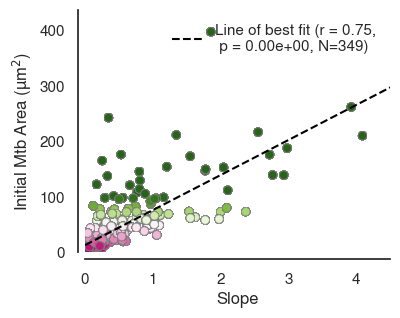

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy.stats import linregress
import os

# Constants for figure size
fig_width_mm = 100
fig_width_inch = fig_width_mm / 25.4
fig_height_mm = 80
fig_height_inch = fig_height_mm / 25.4

# Filter the DataFrame to include only positive slopes
df_filtered = df[df['Slope'] >= 0].copy()

# Set up a colormap with alpha for styling
cmap = cm.get_cmap("PiYG")
colors_with_alpha = cmap(np.linspace(0, 1, 256))
colors_with_alpha[:, 3] = 0.6  # Set alpha to 0.6 for all colors
palette = mcolors.ListedColormap(colors_with_alpha)

# Normalize to cap the color mapping at 100
norm = mcolors.Normalize(vmin=df_filtered['Initial Mtb Area (µm)'].min(), vmax=100)

# Initialize a new column for the initial Mtb Area
df_filtered['Initial Mtb Area (µm)'] = df_filtered.groupby('ID')['Mtb Area Model (µm)'].transform('first')

# Prepare figure
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Plot scatter plot with colormap normalized to final Mtb burden
scatter = plt.scatter(df_filtered['Slope'], df_filtered['Initial Mtb Area (µm)'], 
                      c=df_filtered['Initial Mtb Area (µm)'], cmap=palette, norm=norm,
                      alpha=0.6, edgecolors='gray', linewidths=0.5)

# Add labels and limits
plt.xlabel("Slope")
plt.ylabel("Initial Mtb Area (µm$^2$)")
plt.xlim(0, df_filtered['Slope'].max() * 1.1)
plt.ylim(0, df_filtered['Initial Mtb Area (µm)'].max() * 1.1)
sns.despine(offset=5)

# # Add color bar with capped normalization
# cbar = plt.colorbar(scatter, pad=0.05, aspect=10, shrink=0.9)
# cbar.set_label("Initial Mtb Area (µm$^2$)")
# cbar.ax.tick_params(size=0)
# cbar.outline.set_visible(False)  # Remove the color bar border

# Compute the linear regression and correlation (using filtered data)
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['Slope'], df_filtered['Initial Mtb Area (µm)'])
N = df_filtered['ID'].nunique()

# Plot the best-fit line
x_vals = np.array(plt.xlim())  # Get current x-axis limits
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='black', 
         label=f'Line of best fit (r = {r_value:.2f},\n p = {p_value:.2e}, N={N})')

# Add legend for the best-fit line
plt.legend(frameon=False, loc = 'upper right')

# # Save the plot
# output_dir = '/path/to/output'  # Update this path as needed
plt.savefig('/mnt/SYNO/macrohet_syno/results/manuscript/misc/slope_vs_initial_mtb_area_with_regression_r_value.pdf', bbox_inches='tight', dpi=314)

plt.show()
